In [2]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("Dale Enterprise downloaded April 2025.csv")

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Drop rows with missing temperatures
df = df.dropna(subset=['TMAX', 'TMIN'])

# Create YEAR and MONTH columns
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month


In [4]:
# Filter for January, March, August
df = df[df['MONTH'].isin([1, 3, 8])]


In [5]:
print(df)

           STATION                    NAME       DATE  TMAX  TMIN  TOBS  YEAR  \
1      USC00442208  DALE ENTERPRISE, VA US 1893-01-02  46.0  22.0   NaN  1893   
2      USC00442208  DALE ENTERPRISE, VA US 1893-01-03  42.0  13.0   NaN  1893   
3      USC00442208  DALE ENTERPRISE, VA US 1893-01-04  20.0   7.0   NaN  1893   
4      USC00442208  DALE ENTERPRISE, VA US 1893-01-05  30.0  13.0   NaN  1893   
5      USC00442208  DALE ENTERPRISE, VA US 1893-01-06  28.0   6.0   NaN  1893   
...            ...                     ...        ...   ...   ...   ...   ...   
47965  USC00442208  DALE ENTERPRISE, VA US 2025-03-23  62.0  30.0  35.0  2025   
47968  USC00442208  DALE ENTERPRISE, VA US 2025-03-26  59.0  29.0  40.0  2025   
47969  USC00442208  DALE ENTERPRISE, VA US 2025-03-27  51.0  26.0  30.0  2025   
47970  USC00442208  DALE ENTERPRISE, VA US 2025-03-28  61.0  27.0  44.0  2025   
47972  USC00442208  DALE ENTERPRISE, VA US 2025-03-30  78.0  54.0   NaN  2025   

       MONTH  
1          1

In [6]:
# Calculate mean daily temperature
df['TMEAN'] = (df['TMAX'] + df['TMIN']) / 2

# Split into first 50 years (1893–1942) and last 50 years (1976–2025)
first_50 = df[(df['YEAR'] >= 1893) & (df['YEAR'] <= 1942)]
last_50 = df[(df['YEAR'] >= 1976) & (df['YEAR'] <= 2025)]



In [61]:
# Run t-tests for each month
months = {1: 'January', 3: 'March', 8: 'August'}
for m, name in months.items():
    t1 = first_50[first_50['MONTH'] == m]['TMEAN']
    t2 = last_50[last_50['MONTH'] == m]['TMEAN']
    t_stat, p_val = ttest_ind(t1, t2, equal_var=False, nan_policy='omit')
    print(f"{name}: t = {t_stat:.2f}, p = {p_val:.5f}")
print(t1)
print(t2)

January: t = 3.67, p = 0.00024
March: t = 1.29, p = 0.19754
August: t = -5.26, p = 0.00000
212     69.50
213     69.00
214     71.50
215     62.50
216     69.50
         ... 
18073   61.00
18074   65.50
18075   72.50
18076   68.00
18077   64.50
Name: TMEAN, Length: 1540, dtype: float64
30281   68.00
30282   63.00
30283   64.00
30284   67.00
30285   70.50
         ... 
47758   76.50
47759   78.50
47760   80.50
47761   80.50
47762   74.00
Name: TMEAN, Length: 1513, dtype: float64


C:\Users\anans\AppData\Local\Temp\ipykernel_19472\514594762.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_50['Period'] = '1893–1942'
C:\Users\anans\AppData\Local\Temp\ipykernel_19472\514594762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_50['Period'] = '1976–2025'


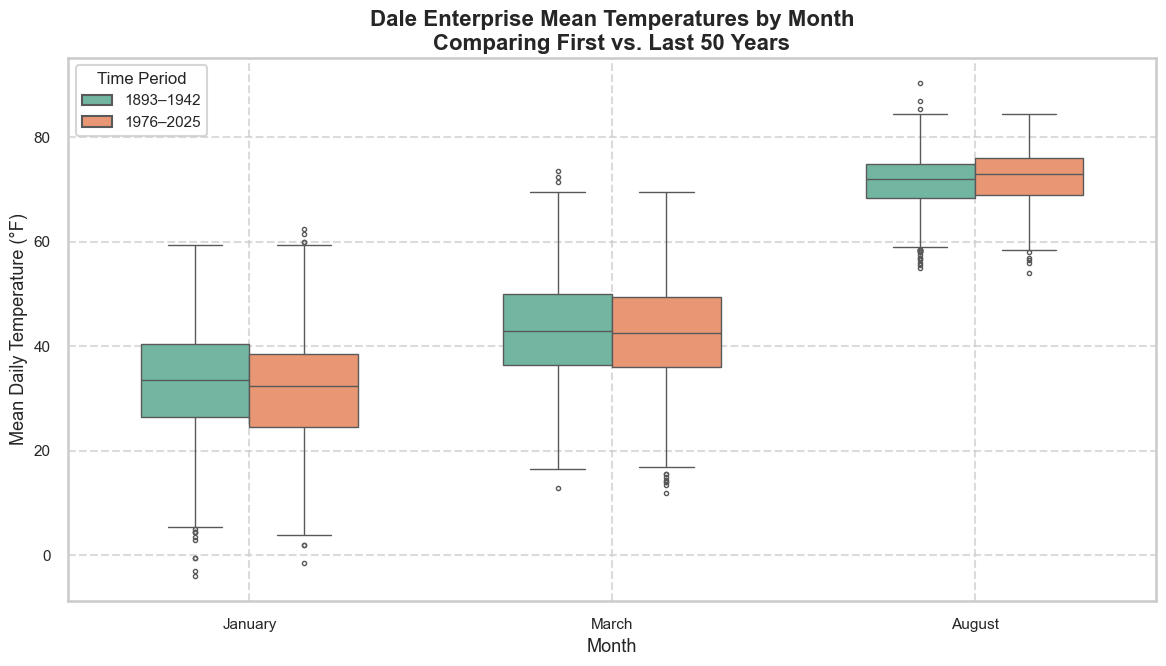

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a modern, clean style
sns.set(style="whitegrid", context="talk", palette="Set2")

# Combine datasets for plotting
first_50['Period'] = '1893–1942'
last_50['Period'] = '1976–2025'
combined = pd.concat([first_50, last_50])

# Optional: Sort months if full set is used; for now just mapping your 3 months
month_order = ['January', 'March', 'August']
month_map = {1: 'January', 3: 'March', 8: 'August'}
combined['MONTH'] = combined['MONTH'].map(month_map)

# Plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=combined, x='MONTH', y='TMEAN', hue='Period', width=0.6, fliersize=3)

# Titles and labels
plt.title("Dale Enterprise Mean Temperatures by Month\nComparing First vs. Last 50 Years", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=13)
plt.ylabel("Mean Daily Temperature (°F)", fontsize=13)

# Clean ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Time Period", title_fontsize=12, fontsize=11)
plt.tight_layout()

plt.show()


In [9]:
# Calculate average TMAX, TMIN, and TMEAN for each period and month
summary = []

for month, name in months.items():
    f = first_50[first_50['MONTH'] == month]
    l = last_50[last_50['MONTH'] == month]

    row = {
        'Month': name,
        'First_50_TMAX': f['TMAX'].mean(),
        'Last_50_TMAX': l['TMAX'].mean(),
        'Diff_TMAX': l['TMAX'].mean() - f['TMAX'].mean(),

        'First_50_TMIN': f['TMIN'].mean(),
        'Last_50_TMIN': l['TMIN'].mean(),
        'Diff_TMIN': l['TMIN'].mean() - f['TMIN'].mean(),

        'First_50_TMEAN': f['TMEAN'].mean(),
        'Last_50_TMEAN': l['TMEAN'].mean(),
        'Diff_TMEAN': l['TMEAN'].mean() - f['TMEAN'].mean(),
    }

    summary.append(row)

# Create summary DataFrame
diff_df = pd.DataFrame(summary)

# Print summary table nicely
pd.set_option('display.float_format', '{:.2f}'.format)
print("📊 Average Temperatures and Differences (°F):")
display(diff_df)


📊 Average Temperatures and Differences (°F):


,Month,First_50_TMAX,Last_50_TMAX,Diff_TMAX,First_50_TMIN,Last_50_TMIN,Diff_TMIN,First_50_TMEAN,Last_50_TMEAN,Diff_TMEAN
0,January,44.45,41.67,-2.78,21.99,21.97,-0.02,33.22,31.82,-1.40
1,March,56.19,54.82,-1.36,30.38,30.83,0.44,43.28,42.82,-0.46
2,August,84.34,84.35,0.01,58.70,60.58,1.88,71.52,72.46,0.94


In [32]:
# Load dataset
df_aleks = pd.read_excel("1 ALEKSANDROVSK SAHALINSKIJ, Russia 1894 - present-1.xlsx")

# Convert DATE to datetime
df_aleks['date'] = pd.to_datetime(df_aleks['date'], errors='coerce')

# Drop rows with missing temperatures
df_aleks = df_aleks.dropna(subset=['max', 'min'])

# Create YEAR and MONTH columns
df_aleks['YEAR'] = df_aleks['date'].dt.year
df_aleks['MONTH'] = df_aleks['date'].dt.month

# Filter for January, March, August
df_aleks = df_aleks[df_aleks['MONTH'].isin([1, 3, 8])]

print(df_aleks)

        station id                       location       date   min   max  \
61     RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 1894-08-01 60.00 65.00   
62     RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 1894-08-02 60.00 66.00   
63     RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 1894-08-03 54.00 69.00   
64     RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 1894-08-04 57.00 66.00   
65     RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 1894-08-05 65.00 74.00   
...            ...                            ...        ...   ...   ...   
43149  RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 2022-03-20 22.00 26.00   
43150  RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 2022-03-21 25.00 27.00   
43151  RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 2022-03-22 26.00 28.00   
43152  RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 2022-03-23 27.00 33.00   
43153  RSM00032061  ALEKSANDROVSK SAHALINSKIJ, RS 2022-03-24 29.00 36.00   

        ave  YEAR  MONTH  
61    56.00  1894      8  
62    58.00  1894      8  
63    

In [60]:
# Calculate mean daily temperature
df_aleks['TMEAN'] = (df_aleks['max'] + df_aleks['max']) / 2

# Split into first 50 years (1893–1942) and last 50 years (1976–2025)
first_50_aleks = df_aleks[(df_aleks['YEAR'] >= 1894) & (df_aleks['YEAR'] <= 1942)]
last_50_aleks = df_aleks[(df_aleks['YEAR'] >= 1972) & (df_aleks['YEAR'] <= 2022)]

# Run t-tests for each month
months = {1: 'January', 3: 'March', 8: 'August'}
for m, name in months.items():
    t1_al = first_50_aleks[first_50_aleks['MONTH'] == m]['TMEAN']
    t2_al = last_50_aleks[last_50_aleks['MONTH'] == m]['TMEAN']
    t_stat, p_val = ttest_ind(t1_al, t2_al, equal_var=False, nan_policy='omit')
    print(f"{name}: t = {t_stat:.2f}, p = {p_val:.5f}")
print(t1_al)
print(t2_al)  

January: t = -4.34, p = 0.00001
March: t = -2.61, p = 0.00917
August: t = 2.75, p = 0.00595
61      65.00
62      66.00
63      69.00
64      66.00
65      74.00
         ... 
14094   70.00
14095   67.00
14096   69.00
14097   67.00
14098   64.00
Name: TMEAN, Length: 1178, dtype: float64
25026   71.00
25027   67.00
25028   57.00
25029   61.00
25030   70.00
         ... 
42944   71.00
42945   69.00
42946   70.00
42947   66.00
42948   63.00
Name: TMEAN, Length: 1548, dtype: float64


In [42]:
# Calculate average TMAX, TMIN, and TMEAN for each period and month
summary_aleks = []

for month, name in months.items():
    f_al = first_50_aleks[first_50_aleks['MONTH'] == month]
    l_al = last_50_aleks[last_50_aleks['MONTH'] == month]

    row = {
        'Month': name,
        'F50_TMAX_RUSSIA': f_al['max'].mean(),
        'L50_TMAX_RUSSIA': l_al['max'].mean(),
        'Diff_TMAX_RUSSIA': l_al['max'].mean() - f_al['max'].mean(),

        'F50_TMIN_RUSSIA': f_al['min'].mean(),
        'L50_TMIN_RUSSIA': l_al['min'].mean(),
        'Diff_TMIN_RUSSIA': l_al['min'].mean() - f_al['min'].mean(),

        'F50_TMEAN_RUSSIA': f_al['TMEAN'].mean(),
        'L50_TMEAN_RUSSIA': l_al['TMEAN'].mean(),
        'Diff_TMEAN_RUSSIA': l_al['TMEAN'].mean() - f_al['TMEAN'].mean(),
    }

    summary_aleks.append(row)

# Create summary DataFrame
diff_df_al = pd.DataFrame(summary_aleks)

# Print summary table nicely
pd.set_option('display.float_format', '{:.2f}'.format)
print("📊 Average Temperatures and Differences (°F):")
display(diff_df_al)


📊 Average Temperatures and Differences (°F):


,Month,F50_TMAX_RUSSIA,L50_TMAX_RUSSIA,Diff_TMAX_RUSSIA,F50_TMIN_RUSSIA,L50_TMIN_RUSSIA,Diff_TMIN_RUSSIA,F50_TMEAN_RUSSIA,L50_TMEAN_RUSSIA,Diff_TMEAN_RUSSIA
0,January,8.41,9.99,1.58,0.11,2.36,2.25,8.41,9.99,1.58
1,March,24.92,25.72,0.80,15.85,18.14,2.29,24.92,25.72,0.80
2,August,69.42,68.83,-0.59,61.92,61.74,-0.18,69.42,68.83,-0.59


In [45]:
# Load dataset
df_ind = pd.read_excel("14 Hambantota India.xlsx")

# Convert DATE to datetime
df_ind['DATE'] = pd.to_datetime(df_ind['DATE'], errors='coerce')

# Drop rows with missing temperatures
df_ind = df_ind.dropna(subset=['TMAX', 'TMIN'])

# Create YEAR and MONTH columns
df_ind['YEAR'] = df_ind['DATE'].dt.year
df_ind['MONTH'] = df_ind['DATE'].dt.month

# Filter for January, March, August
df_ind = df_ind[df_ind['MONTH'].isin([1, 3, 8])]

print(df_ind)

           STATION            NAME       DATE  TAVG  TMAX  TMIN  YEAR  MONTH
0      CE000043497  HAMBANTOTA, CE 1869-01-01   NaN 81.00 74.00  1869      1
1      CE000043497  HAMBANTOTA, CE 1869-01-02   NaN 80.00 75.00  1869      1
2      CE000043497  HAMBANTOTA, CE 1869-01-03   NaN 82.00 74.00  1869      1
3      CE000043497  HAMBANTOTA, CE 1869-01-04   NaN 83.00 74.00  1869      1
4      CE000043497  HAMBANTOTA, CE 1869-01-05   NaN 80.00 73.00  1869      1
...            ...             ...        ...   ...   ...   ...   ...    ...
51236  CE000043497  HAMBANTOTA, CE 2025-03-03 79.00 90.00 75.00  2025      3
51243  CE000043497  HAMBANTOTA, CE 2025-03-10 80.00 92.00 74.00  2025      3
51250  CE000043497  HAMBANTOTA, CE 2025-03-17 80.00 90.00 75.00  2025      3
51253  CE000043497  HAMBANTOTA, CE 2025-03-20 84.00 93.00 76.00  2025      3
51264  CE000043497  HAMBANTOTA, CE 2025-03-31 82.00 90.00 76.00  2025      3

[11174 rows x 8 columns]


In [50]:
# Calculate mean daily temperature
df_ind['TMEAN'] = (df_ind['TMAX'] + df_ind['TMIN']) / 2


first_50_ind = df_ind[(df_ind['YEAR'] >= 1869) & (df_ind['YEAR'] <= 1919)]
last_50_ind = df_ind[(df_ind['YEAR'] >= 1975) & (df_ind['YEAR'] <= 2025)]

# Run t-tests for each month
months = {1: 'January', 3: 'March', 8: 'August'}
for m, name in months.items():
    t1_ind = first_50_ind[first_50_ind['MONTH'] == m]['TMEAN']
    t2_ind = last_50_ind[last_50_ind['MONTH'] == m]['TMEAN']
    t_stat, p_val = ttest_ind(t1_ind, t2_ind, equal_var=False, nan_policy='omit')
    print(f"{name}: t = {t_stat:.2f}, p = {p_val:.5f}")

print(t1_ind)
print(t2_ind)   

January: t = -22.26, p = 0.00000
March: t = -18.53, p = 0.00000
August: t = -5.54, p = 0.00000
209     80.00
210     76.50
211     81.50
212     79.00
213     79.00
         ... 
17884   81.00
17885   81.50
17886   83.00
17887   82.00
17888   81.50
Name: TMEAN, Length: 1409, dtype: float64
34300   81.50
34301   82.50
34302   83.50
34303   83.50
34304   82.50
         ... 
50326   84.50
51038   83.50
51043   83.50
51056   81.00
51057   80.50
Name: TMEAN, Length: 971, dtype: float64


In [ ]:
# Calculate average TMAX, TMIN, and TMEAN for each period and month
summary_ind = []

for month, name in months.items():
    f_ind = first_50_ind[first_50_ind['MONTH'] == month]
    l_ind = last_50_ind[last_50_ind['MONTH'] == month]

    row = {
        'Month': name,
        'F50_TMAX_INDIA': f_ind['TMAX'].mean(),
        'L50_TMAX_INDIA': l_ind['TMAX'].mean(),
        'Diff_TMAX_INDIA': l_ind['TMAX'].mean() - f_ind['TMAX'].mean(),

        'F50_TMIN_INDIA': f_ind['TMIN'].mean(),
        'L50_TMIN_INDIA': l_ind['TMIN'].mean(),
        'Diff_TMIN_INDIA': l_ind['TMIN'].mean() - f_ind['TMIN'].mean(),

        'F50_TMEAN_INDIA': f_ind['TMEAN'].mean(),
        'L50_TMEAN_INDIA': l_ind['TMEAN'].mean(),
        'Diff_TMEAN_INDIA': l_ind['TMEAN'].mean() - f_ind['TMEAN'].mean(),
    }

    summary_ind.append(row)

# Create summary DataFrame
diff_df_ind = pd.DataFrame(summary_ind)

# Print summary table nicely
pd.set_option('display.float_format', '{:.2f}'.format)
print("📊 Average Temperatures and Differences (°F):")
display(diff_df_ind)


📊 Average Temperatures and Differences (°F):


,Month,F50_TMAX_INDIA,L50_TMAX_INDIA,Diff_TMAX_INDIA,F50_TMIN_INDIA,L50_TMIN_INDIA,Diff_TMIN_INDIA,F50_TMEAN_INDIa,L50_TMEAN_INDIA,Diff_TMEAN_INDIA
0,January,85.01,86.65,1.64,71.86,73.37,1.52,78.43,80.01,1.58
1,March,87.74,88.49,0.75,73.44,75.18,1.74,80.59,81.84,1.24
2,August,87.42,87.26,-0.16,75.31,76.42,1.11,81.37,81.84,0.47


In [55]:
# Load dataset
df_kaz = pd.read_csv("2 Almaty Kazakhstan 1915 to present.csv")

# Convert DATE to datetime
df_kaz['DATE'] = pd.to_datetime(df_kaz['DATE'], errors='coerce')

# Drop rows with missing temperatures
df_kaz = df_kaz.dropna(subset=['TMAX', 'TMIN'])

# Create YEAR and MONTH columns
df_kaz['YEAR'] = df_kaz['DATE'].dt.year
df_kaz['MONTH'] = df_kaz['DATE'].dt.month


In [58]:
# Calculate mean daily temperature
df_kaz['TMEAN'] = (df_kaz['TMAX'] + df_kaz['TMIN']) / 2


first_50_kaz = df_kaz[(df_kaz['YEAR'] >= 1890) & (df_kaz['YEAR'] <= 1940)]
last_50_kaz = df_kaz[(df_kaz['YEAR'] >= 1975) & (df_kaz['YEAR'] <= 2025)]

# Run t-tests for each month
months = {1: 'January', 3: 'March', 8: 'August'}
for m, name in months.items():
    t1_kaz = first_50_kaz[first_50_kaz['MONTH'] == m]['TMEAN']
    t2_kaz = last_50_kaz[last_50_kaz['MONTH'] == m]['TMEAN']
    t_stat, p_val = ttest_ind(t1_kaz, t2_kaz, equal_var=False, nan_policy='omit')
    print(f"{name}: t = {t_stat:.2f}, p = {p_val:.5f}")

print(t1_kaz)
print(t2_kaz)   

January: t = -5.73, p = 0.00000
March: t = -6.19, p = 0.00000
August: t = -1.55, p = 0.12112
1642    60.50
1643    62.00
1644    59.50
1645    54.50
1646    62.50
         ... 
14945   58.00
14946   55.50
14947   57.00
14948   63.50
14949   60.00
Name: TMEAN, Length: 1116, dtype: float64
27702   58.50
27703   59.50
27704   57.00
27705   57.00
27706   59.50
         ... 
44525   67.00
44526   64.00
44527   65.50
44528   61.50
44529   59.00
Name: TMEAN, Length: 1455, dtype: float64


In [59]:
# Calculate average TMAX, TMIN, and TMEAN for each period and month
summary_kaz = []

for month, name in months.items():
    f_kaz = first_50_kaz[first_50_kaz['MONTH'] == month]
    l_kaz = last_50_kaz[last_50_kaz['MONTH'] == month]

    row = {
        'Month': name,
        'F50_TMAX_kazakhstan': f_kaz['TMAX'].mean(),
        'L50_TMAX_kazakhstan': l_kaz['TMAX'].mean(),
        'Diff_TMAX_kazakhstan': l_kaz['TMAX'].mean() - f_kaz['TMAX'].mean(),

        'F50_TMIN_kazakhstan': f_kaz['TMIN'].mean(),
        'L50_TMIN_kazakhstan': l_kaz['TMIN'].mean(),
        'Diff_TMIN_kazakhstan': l_kaz['TMIN'].mean() - f_kaz['TMIN'].mean(),

        'F50_TMEAN_kazakhstan': f_kaz['TMEAN'].mean(),
        'L50_TMEAN_kazakhstan': l_kaz['TMEAN'].mean(),
        'Diff_TMEAN_kazakhstan': l_kaz['TMEAN'].mean() - f_kaz['TMEAN'].mean(),
    }

    summary_kaz.append(row)

# Create summary DataFrame
diff_df_kaz = pd.DataFrame(summary_kaz)

# Print summary table nicely
pd.set_option('display.float_format', '{:.2f}'.format)
print("📊 Average Temperatures and Differences (°F):")
display(diff_df_kaz)


📊 Average Temperatures and Differences (°F):


,Month,F50_TMAX_kazakhstan,L50_TMAX_kazakhstan,Diff_TMAX_kazakhstan,F50_TMIN_kazakhstan,L50_TMIN_kazakhstan,Diff_TMIN_kazakhstan,F50_TMEAN_kazakhstan,L50_TMEAN_kazakhstan,Diff_TMEAN_kazakhstan
0,January,8.79,9.98,1.19,-8.25,-4.79,3.46,0.27,2.60,2.33
1,March,25.06,25.78,0.72,6.57,10.12,3.55,15.82,17.95,2.14
2,August,69.59,68.89,-0.71,54.39,55.69,1.30,61.99,62.29,0.30
